
## <span style='color:#e91e63'>LAB 7 \(Due Wed, Oct 22 by 11:59pm\). </span>

<span style='color:#e91e63'>For each exercise, answer in the cell below each exercise. Make sure to transfer your answers to Gradescope for your final submission! Please note that some exercises require code while some just require an English answer to a code\-related question. If so, begin the cell with \#.</span>

<span style='color:#e91e63'><u>Submitting:</u></span><span style='color:#e91e63'> You can keep scratch work in this notebook, but you will submit all your final responses on the assignment linked from D2L, which routes you to Gradescope for your submission. </span>


#### <span style='color:#3f51b5'>Question 0: Functions and Left vs Right Sums </span>


In labs we often ask you to define a new function, or we ask you to find the output of a function for some input [for example (x,y) or (A,B)]. Defining a function and calling a function are two very different things in Sagemath.

**Question 0.1:** Suppose you want to approximate the integral $\int_0^5 f'(t) \, dt$.  For convenience, we can give this integral a name, $F$, by defining $F(x) = \int_0^{x} f'(t) \, dt$.  So you are trying to find $F(5)$.   We can estimate this value using a the Left Sum.

A few more details: 
- You want to approximate $F(5)$
- $F(0)=0$
- Start the Left Sum at $t=0$
- $\Delta t=1$

The code below approximates $F(5)$ with a Right Sum. Change the code to approximate $F(5)$ with a left sum by doing the following:
- Rename RS to LS.
- While the Right Sum uses the $t$-values 1,2,3,4 and 5, the Left Sum uses the $t$-values 0,1,2,3 and 4. This is the only difference.







In [0]:
var('t')
f(t)=2*exp(2*t) #This is the function inside the integral
dt=1 #time step
RS=sum(f(t*dt)*dt,t,1,5) ## You should modify this line because it is currently doing a right sum approximation of the integral (F(5)).  The sum command has four arguements: function, variable, start, stop.
F_0 = 0 #F(0) = 0
F_5_estimate = RS + F_0 ## You should modify this line because it is currently doing a right sum approximation of the integral (F(5)).

In [2]:
##Copy and paste, then modify here for Question 0.1
var('t')
f(t)=2*exp(2*t) #This is the function inside the integral
dt=1 #time step
LS=sum(f(t*dt)*dt,t,0,4) ## You should modify this line because it is currently doing a right sum approximation of the integral (F(5)).  The sum command has four arguements: function, variable, start, stop.
F_0 = 0 #F(0) = 0
F_5_estimate = LS + F_0 ## You should modify this line because it is currently doing a right sum approximation of the integral (F(5)).
F_5_estimate ## Shows the new left hand sum estimate

2*e^8 + 2*e^6 + 2*e^4 + 2*e^2 + 2

**Question 0.2:** Now that you have defined an approximation of $F(5)$, output this value in two ways:
- Call it by its name (like we have done in previous labs)
- Using the $\tt{n( *** )}$ function where the thing we want to display goes in place of the $\tt{***}$.  (e.g. $\tt{n(sqrt(2))}$ will output 1.414...)  In this case, we want to output the left approximation we made in the previous part.


In [5]:
## Code for Question 0.2
F_5_estimate
n(F_5_estimate)

6894.74797333308

#### <span style='font-family:Arial'><span style='color:#3f51b5'>**Question 1: Antiderivative Functions**</span></span>

Just like we had the command $\tt{diff ( \, )}$ for computing the derivative of a function, we can also use a command to find the antiderivative of a given function.  Recall that $\tt{diff( \, )}$ had two arguments: first the function, second the independent variable.  

The antiderivative command works the same way: $\tt{integral(\, )}$ has two arguments: first the function you want an antiderivative of, second the independent variable.  To find the antiderivative of a function $fprime(x)$, we would use $\tt{integral(fprime(x),x)}$.  

_Example:_ Recall that if we have a function $x^2$, we can find the derivative by doing $\tt{diff(x^2, x)}$. The $\tt{integral()}$ command is similar to $\tt{diff()}$, where it will take two arguments: the first is the function to integrate and the second is the variable to do the integration with.  So to compute the antiderivative of $x^2$, we would write $\tt{integral(x^2,x)}$.

**Question 1.1:** Write a **single line** of code to find the antiderivative of the function $f(x) = x^3 -2x^2+4$.







In [6]:
#Write your single line of code here.  You will need to write the explicit function, not just the name, and don't forget asterisks for multiplication!
integral(x^3-2*x^2+4,x)

1/4*x^4 - 2/3*x^3 + 4*x



**Question 1.2:**  Sagemath can even find antiderivatives of functions with parameters in them.  Modify the code below to find the antiderivative of the function $f'(t) = at^2+bt+c$.


In [0]:
var('a','b','c','t')
fprime(t)=***
integral(***)

In [7]:
#Copy and Paste, then modify here
var('a','b','c','t')
fprime(t)=a*t^2+b*t+c
integral(fprime(t),t)

1/3*a*t^3 + 1/2*b*t^2 + c*t

#### <span style='font-family:Arial'><span style='color:#3f51b5'>**Question 2: Left Sums, Right Sums, Trapezoid Sums**</span></span>

As we saw in class, the exact area under a curve can be hard to calculate, but the approximation of the area using rectangles is pretty straightforward.   In this set of problems, you will explore left and right sum approximations and how those approximations differ from the exact, true area under a curve.

As a reminder, we know that the notation $\displaystyle \int_a^b f(t) \, dt$ means the exact net area underneath the function $f(t)$ from $t=a$ to $t=b$.  Even though the exact area may be hard to find, we could always approximate it using rectangles.  If we divide the interval $[a,b]$ into equally sized pieces of $\Delta t$, we can use that value as the width.  Using a uniform value for $\Delta t$ means the rectangles all have a fixed width, and only the height of the rectangle will change based on the function values at different points.  The height of the rectangle comes from the function value at a particular point.  Therefore, if we add up all the areas of the little rectangles, we should get a decent approximation of the area under the curve.  We can then make the approximation better by using more rectangles.

When approximating the area under a curve with rectangles, we need to know four things:
- where to start ($a$)
- where to end ($b$)
- the number of rectangles to use ($n$)
- the function that represents the height of the rectangle ($f$)



**Question 2.1:** Copy the code below, then modify the four bullet points mentioned above to compute and plot the left-hand and right-hand sums of the integral $\displaystyle \int_{0}^{1} \sqrt{1-x^3} \, dx$ using 6 rectangles.  Note: the Sagemath command for the square root function is $\tt{sqrt( \, )}$.







In [0]:
f(x)= ***  #the function that represents the height of the rectangle
a=***  #the lower limit of integration, where you want the area to start
b=*** #the upper limit of integration, where you want the area to end
n=***  #the number of rectangles you want to use


dx=(b-a)/n  #this divides the interval into n equal parts and makes the width of each rectangle the same
p=plot(f,(a,b),color='black');q=p  
for i in [0..n-1]:
    p=p+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
p.show(title='Lefthand Sum')
for i in [0..n-1]:
    q=q+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
q.show(title='Righthand Sum')

i=var('i')
LS=sum(f(a+i*dx)*dx,i,0,n-1) #calculates the value of the left sum
print ('The left sum is',N(LS))
RS=sum(f(a+i*dx)*dx,i,1,n)   #calculates the value of the right sum
print ('The right sum is',N(RS))

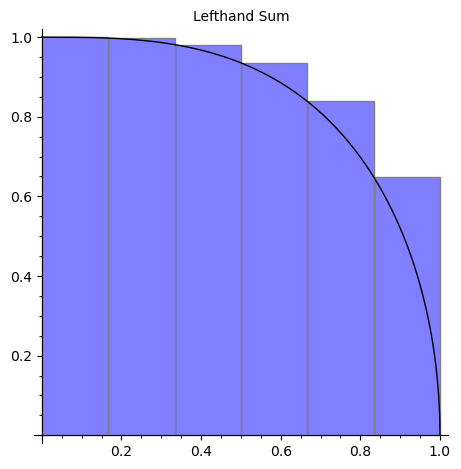

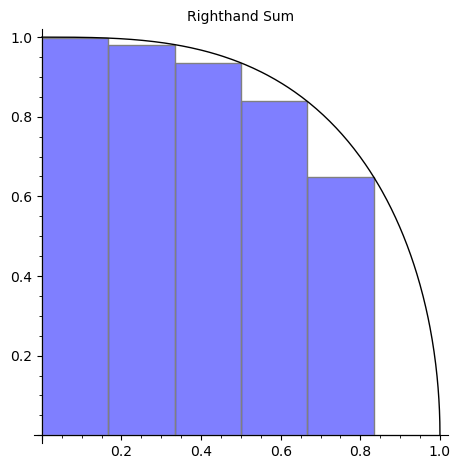

The left sum is 0.900391252641628
The right sum is 0.733724585974961


In [8]:
#Copy and Paste, then modify here
#Copy and Paste, then modify here
f(x)= sqrt(1-x^3)  #the function that represents the height of the rectangle
a=0  #the lower limit of integration, where you want the area to start
b=1 #the upper limit of integration, where you want the area to end
n=6  #the number of rectangles you want to use


dx=(b-a)/n  #this divides the interval into n equal parts and makes the width of each rectangle the same
p=plot(f,(a,b),color='black');q=p  
for i in [0..n-1]:
    p=p+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
p.show(title='Lefthand Sum')
for i in [0..n-1]:
    q=q+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
q.show(title='Righthand Sum')

i=var('i')
LS=sum(f(a+i*dx)*dx,i,0,n-1) #calculates the value of the left sum
print ('The left sum is',N(LS))
RS=sum(f(a+i*dx)*dx,i,1,n)   #calculates the value of the right sum
print ('The right sum is',N(RS))

**Question 2.2:** Notice that the function $\sqrt{1-x^3}$ in the previous part is always decreasing on the interval $[0,1]$.  How did the left sum relate to the exact area under the curve?  How did the right sum relate to the exact area under the curve?

In [0]:
#2.2: Left sum is overestimate, right sum is underestimate

**Question 2.3:**  Let's do the same thing for $\displaystyle \int_{1}^{20} x^{0.6} \, dx$ with 10 rectangles.  Copy and paste your code from above and modify for the new function, new interval, and new number of rectangles.

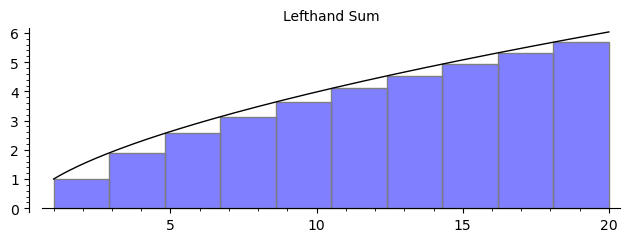

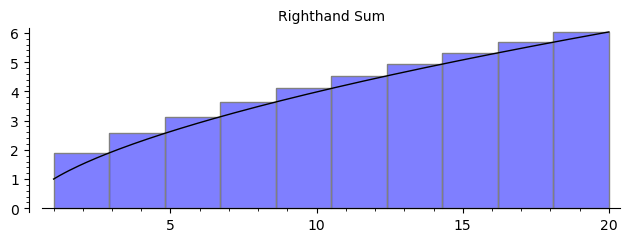

The left sum is 69.8979331188379
The right sum is 79.4628681582737


In [9]:
#Copy and Paste, then modify here
#Copy and Paste, then modify here
f(x)= x^0.6  #the function that represents the height of the rectangle
a=1  #the lower limit of integration, where you want the area to start
b=20 #the upper limit of integration, where you want the area to end
n=10  #the number of rectangles you want to use


dx=(b-a)/n  #this divides the interval into n equal parts and makes the width of each rectangle the same
p=plot(f,(a,b),color='black');q=p  
for i in [0..n-1]:
    p=p+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
p.show(title='Lefthand Sum')
for i in [0..n-1]:
    q=q+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
q.show(title='Righthand Sum')

i=var('i')
LS=sum(f(a+i*dx)*dx,i,0,n-1) #calculates the value of the left sum
print ('The left sum is',N(LS))
RS=sum(f(a+i*dx)*dx,i,1,n)   #calculates the value of the right sum
print ('The right sum is',N(RS))

**Question 2.4:** This time we have an increasing function.  How does the left sum relate to the exact area under the curve?  How does the right sum relate to the exact area under the curve?

In [0]:
#2.4: left sum is an underestimate, right sum is an overestimate

We have been using rectangles because the area of a rectangle is a really simple formula, but we often need to use lots of them to get an accurate approximation of the exact area under the curve.  One way we could make our approximations more accurate would be to use linear functions as the top of our "rectangles" instead of a flat top.  In other words, using a trapezoid may actually give us a better approximation.

**Question 2.5:**  Copy the code below, then modify it to give an approximation of $\displaystyle \int_{0}^{1} \sqrt{1-x^3} \, dx$ using the new trapezoidal sum with 6 trapezoids.  You only need to change the asterisks in the first four lines of code.


In [0]:
f(x)=*** #the function that represents the top of the area
a=*** #the lower limit of integration, where you want the area to start
b=***  #the upper limit of integration, where you want the area to end
n=***  #the number of trapezoids you want to use



dx=(b-a)/n   #this divides the interval into equal parts and makes the width of each trapezoid the same
t=plot(f,(a,b),color='black')
for i in [0..n-1]: 
    t=t+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=.5,edgecolor='gray')
t.show(title='Trapezoidal Sum',aspect_ratio='automatic')

var('i')
T=sum((f(a+i*dx)+f(a+(i+1)*dx))*dx/2,i,0,n-1)   #calculates the value of the trapezoidal sum
print('The Trapezoidal Sum gives', N(T))

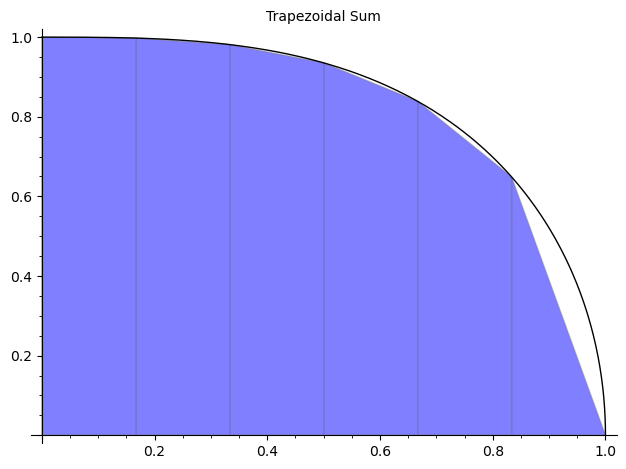

The Trapezoidal Sum gives 0.817057919308295


In [10]:
#Copy and Paste, then modify here.
#Copy and Paste, then modify here.
f(x)=sqrt(1-x^3) #the function that represents the top of the area
a=0 #the lower limit of integration, where you want the area to start
b=1  #the upper limit of integration, where you want the area to end
n=6  #the number of trapezoids you want to use



dx=(b-a)/n   #this divides the interval into equal parts and makes the width of each trapezoid the same
t=plot(f,(a,b),color='black')
for i in [0..n-1]: 
    t=t+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=.5,edgecolor='gray')
t.show(title='Trapezoidal Sum',aspect_ratio='automatic')

var('i')
T=sum((f(a+i*dx)+f(a+(i+1)*dx))*dx/2,i,0,n-1)   #calculates the value of the trapezoidal sum
print('The Trapezoidal Sum gives', N(T))

#### <span style='font-family:Arial'><span style='color:#3f51b5'>**Question 3: Accuracy and Identification**</span></span>

**Question 3.1:** In this problem we implement a slider to allow us to change the number of rectangles on the fly.  The values of the approximations are below the plots.  Just run the code below.  
What do you expect the values of the two types of sums to do if we continued to increase the number of rectangles?


In [11]:
@interact
def rectangle(n=(1,25)):
    f(x)=1/(1+x^2)
    a=-0.5
    b=2
    dx=(b-a)/n
    p=plot(f,(a,b),color='black');q=p
    for i in [0..n-1]:
        p=p+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],alpha=.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
    p.show(title='Left Riemann Sum')
    for i in [0..n-1]:
        q=q+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')
    q.show(title='Right Riemann Sum')
    #print ('')
    i=var('i')
    LS=sum(f(a+i*dx)*dx,i,0,n-1) #calculates left sum
    print('The left Riemann sum is',LS.n(digits=5))
    RS=sum(f(a+i*dx)*dx,i,1,n)   #calculates right sum
    print('The right Riemann sum is',RS.n(digits=5))

Interactive function <function rectangle at 0x7fb63eb8d3a0> with 1 widget
  n: IntSlider(value=13, description='n', max=25, min=1)

In [0]:
#3.1: Both get better estimates since width is decreasing, and both would get closer to the exact area under the curve.

**Question 3.2:**  Below is code to make three approximations of the integral $\displaystyle \int_{-2}^{3} \cos(x) \, dx$ using 8 rectangles or trapezoids.  Identify which graph is a left sum, a right sum, and the trapezoidal sum.
Run the code to generate the three plots.



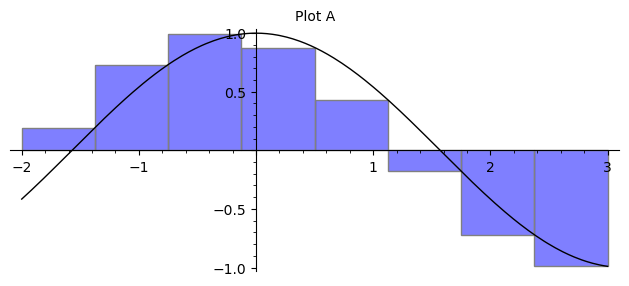

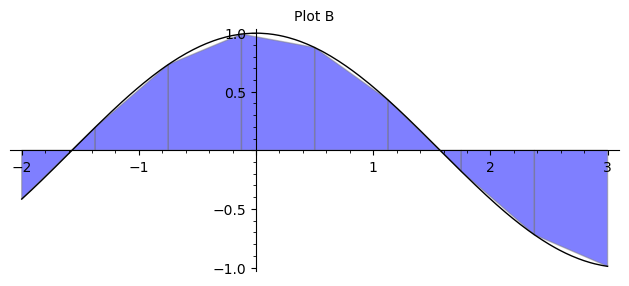

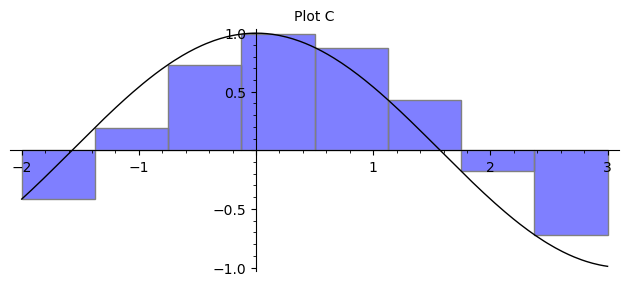

In [12]:
f(x)=cos(x) #the function that represents the top of the area
a=-2  #the lower limit of integration, where you want the area to start
b=3  #the upper limit of integration, where you want the area to end
n=8  #the number of shapes you want to use


dx=(b-a)/n  #this divides the interval into equal parts and makes the width of each rectangle the same
p=plot(f,(a,b),color='black');q=p  
for i in [0..n-1]:
    q=q+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+i*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')

for i in [0..n-1]:
    p=p+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=0.5)+polygon([(a+i*dx,0),(a+i*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],fill=False,color='gray')

t=plot(f,(a,b),color='black')
for i in [0..n-1]:
    t=t+polygon([(a+i*dx,0),(a+i*dx,f(a+i*dx)),(a+(i+1)*dx,f(a+(i+1)*dx)),(a+(i+1)*dx,0)],alpha=.5,edgecolor='gray')
p.show(title='Plot A')
t.show(title='Plot B')
q.show(title='Plot C')



In [0]:
#3.2: A is Right, B is Trap, C is left

#### <span style='font-family:Arial'><span style='color:#3f51b5'>**Question 4: Pharmacology - Antibiotics and Antivenom**</span></span>

Citation: This problem was adapted in consultation with emergency medicine clinical pharmacist, Clarissa Sema (PharmD, BCEMP), from an exercise in _Clinical Pharmacokinetics and Pharmacodynamics: Concepts and Applications_ by Malcolm Rowland, Thomas N. Tozer.

In real world calculations, we most often only have discrete data points, not a nice formula for a function.  In the following problems we will use sample data from a commonly used antibiotic and analyze it as a pharmacist would.  Pharmacology is the study of how drugs and the body interact.  Pharmacokinetics is a subfield that studies what the body does to a drug, and pharmacodynamics studies what the drug does to the body.  In this example, we will do a routine pharmacokinetic calculation that clinical pharmacists often make when giving antibiotics to a hospital patient.  

Vancomycin is a common antibiotic that is administered intravenously to target bacterial infections in the body.  Pharmacists will track the concentration of Vancomycin in blood plasma over time to make sure that the right concentration is achieved.  If too little concentration is observed, then the drug may not be effective.  If the concentration is too high, then you can run the risk of kidney injury from high toxicity.  Pharmacists use the area under the concentration\-time curve to make sure that the concentration is not too low or too high.  This procedure is used so often that this is abbreviated as the _AUC_, and pharmacists almost always use a trapezoidal approximation.



Suppose we have a patient who is given an IV bolus of Vancomycin and we want to track how well the drug is being distributed into the bloodstream.  Below is a table of data about the concentration $C$ of Vancomycin, measured in mg/L, in a patient's plasma at time $t$, measured in hours since the drug was given.  

| t    | 0 | 1 | 2  | 3 | 4   | 5    | 6   | 7   | 8 |
|------|---|---|----|---|-----|------|-----|-----|---|
| C(t) | 0 | 7 | 10 | 5 | 2.5 | 1.25 | 0.6 | 0.2 | 0 |



**Question 4.1:**   What are the units of $\displaystyle \int_0^8 C(t) \, dt$?



In [0]:
#4.1: (Units of C)*(units of t) = (mg/L)*(hour)

**Question 4.2:** When a drug is administered, it goes through phases: absorption, distribution, metabolization, and excretion.  The first two phases happen while the drug infuses into the bloodstream and the latter two phases happen as the drug diffuses.  

At what time would the antibiotic be finished infusing the drug into the bloodstream?  Explain which approximation \(left sum, right sum, or trapezoidal sum\) you are basing your decision off of and what feature\(s\) of the graph help you make your decision.  

**Hint:** While the antibiotic is infusing into the bloodstream, what should be happening to the _concentration_ of the drug in the body?



Run the code below to show plots of approximations using the left sum, right sum, and trapezoidal sum for the data.

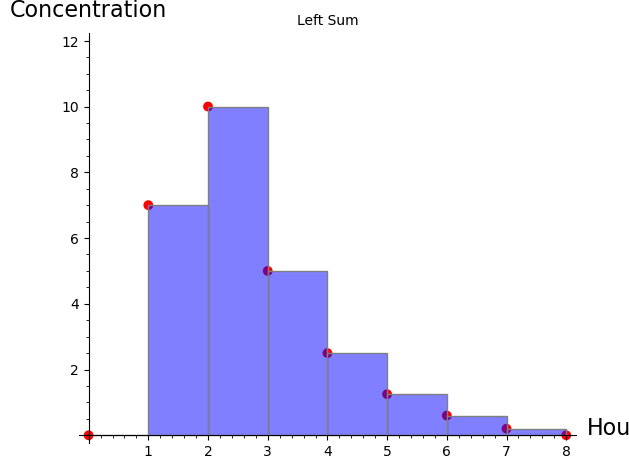

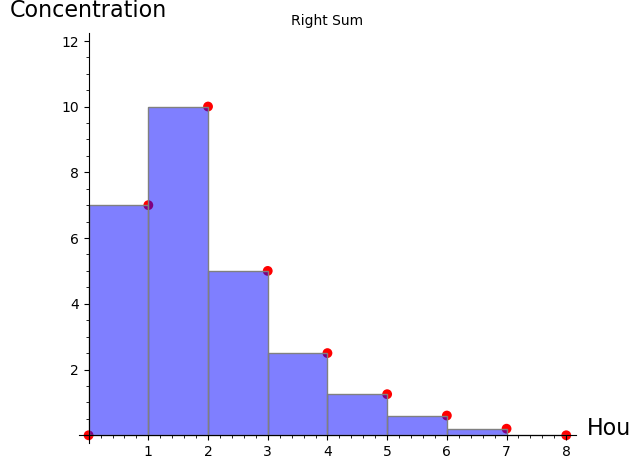

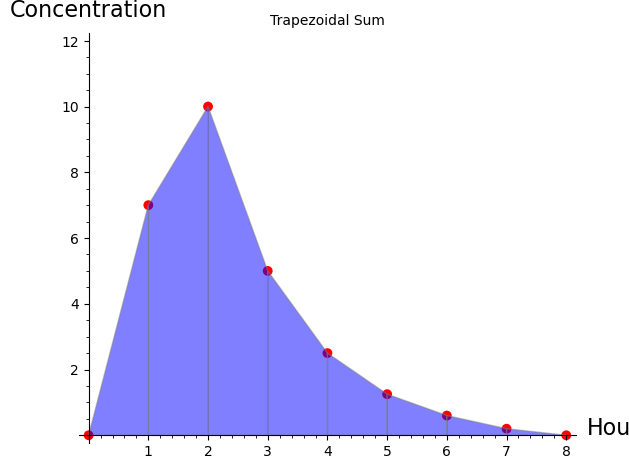

The left sum is 26.5500000000000
The right sum is 26.5500000000000
The trapezoidal sum is 26.5500000000000


In [13]:
tdata=[0,1,2,3,4,5,6,7,8]
Cdata=[0, 7, 10, 5, 2.5, 1.25, .6, 0.2, 0]
data=list(zip(tdata,Cdata))
p=list_plot(data,ymax=12, color='red', size=50, axes_labels=['Hours','Concentration'])
q=p
t=p
for i in srange(0,len(tdata)-1):
    p=p+polygon([(tdata[i],0),(tdata[i],Cdata[i]),(tdata[i+1],Cdata[i]),(tdata[i+1],0)],alpha=0.5)+polygon([(tdata[i],0),(tdata[i],Cdata[i]),(tdata[i+1],Cdata[i]),(tdata[i+1],0)],fill=False,color='gray')
for i in srange(0,len(tdata)-1):
        q=q+polygon([(tdata[i],0),(tdata[i],Cdata[i+1]),(tdata[i+1],Cdata[i+1]),(tdata[i+1],0)],alpha=.5)+polygon([(tdata[i],0),(tdata[i],Cdata[i+1]),(tdata[i+1],Cdata[i+1]),(tdata[i+1],0)],fill=False,color='gray')
for i in srange(0,len(tdata)-1):
    t=t+polygon([(tdata[i],0),(tdata[i],Cdata[i]),(tdata[i+1],Cdata[i+1]),(tdata[i+1],0)],alpha=.5,edgecolor='gray')
show(p, aspect_ratio='automatic', title='Left Sum')
show(q, aspect_ratio='automatic', title='Right Sum')
show(t, aspect_ratio='automatic', title='Trapezoidal Sum')

LS=sum([Cdata[i] for i in srange(0,len(Cdata)-1)])
RS=sum([Cdata[i] for i in srange(1,len(Cdata))])
T=sum([(Cdata[i]+Cdata[i+1])/2 for i in srange(0,len(Cdata)-1)])
#LS=sum(Cdata[i],0,len(tdata)-1) #calculates left sum
#RS=sum(Cdata[i],i,1,len(tdata))   #calculates right sum
#T=sum((Cdata[i]+Cdata[i+1])/2,i,0,len(tdata)-1)
print('The left sum is',LS)
print ('The right sum is',RS)
print('The trapezoidal sum is', T)

In [0]:
#4.2: 2 hours after the antibiotic is given

**Question 4.3:** Based on the plot of the trapezoidal sum, when would a pharmacist be most concerned about kidney injury from high toxicity?


In [0]:
#4.3: 2 hours later since that's the peak concentration

One relatively common reason for hospitalization in Arizona is from envenomation by a snake bite.  The drug Anavip is typically given through an IV to patients in emergency rooms that have been bitten by venomous snakes.  The drug works by binding to and neutralizing venom toxins in the blood, which are then excreted from the body.  Below is a table of data about the concentration $C$ of Anavip, measured in mg/L, in a patient's plasma at time $t$, measured in hours since the drug was given.   (Note:  The last entry in the table is when $t = 24$, so if your browser cuts off the table, scroll to the right.)

| t    | 0 | 0.5  | 1    | 1.5  | 2    | 3    | 4    | 6    | 8     | 10    | 12    | 14    | 24    |
|------|---|------|------|------|------|------|------|------|-------|-------|-------|-------|-------|
| C(t) | 0 | 2.14 | 2.95 | 3.25 | 3.27 | 2.68 | 2.15 | 1.12 | 0.611 | 0.321 | 0.180 | 0.101 | 0.011 |



**Question 4.4:**  Copy the code from the Vancomycin example into the cell below.  Update the following:

- $\tt{tdata}$ list to match the above table
- $\tt{Cdata}$ list to match the above table
- in the plot named $\tt{p}$, updated $\tt{ymax}$ value to 4 \(this is the fourth line of code\)

Out of the three estimates, give the most accurate approximation for the area under the curve.  Round to **four decimal places.**



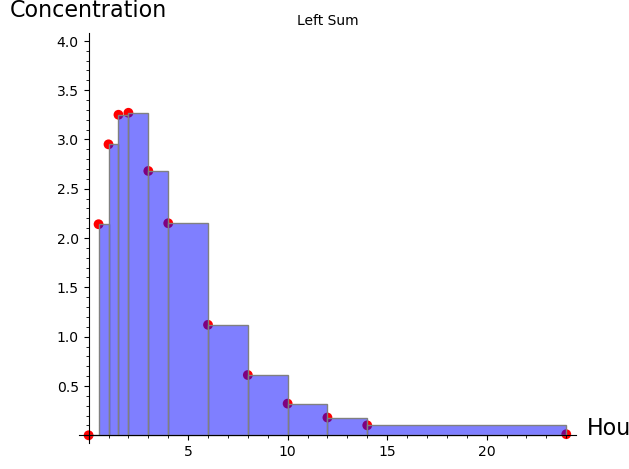

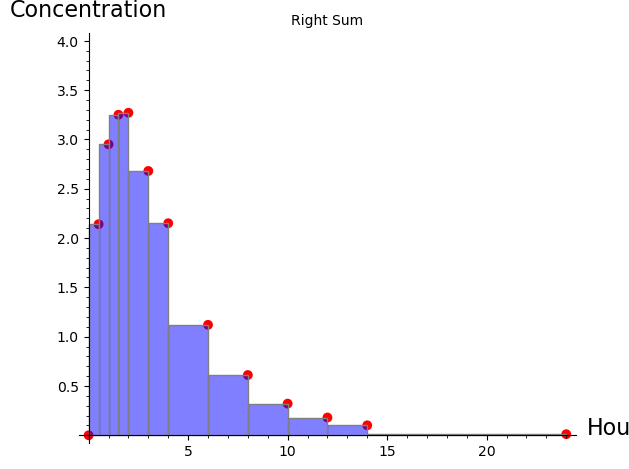

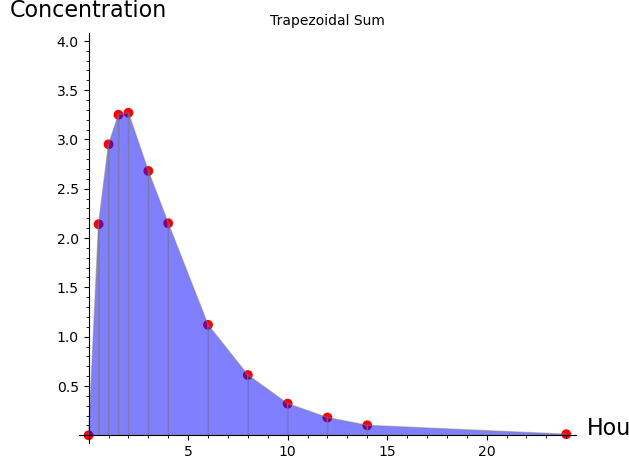

The left sum is 18.7730000000000
The right sum is 18.7840000000000
The trapezoidal sum is 18.7785000000000


In [14]:
# Copy and Paste, then modify here
# Copy and Paste, then modify here
tdata=[0,0.5,1,1.5,2,3,4,6,8,10,12,14,24]
Cdata=[0,2.14,2.95,3.25,3.27,2.68,2.15,1.12,0.611,0.321,0.180,0.101,0.011]
data=list(zip(tdata,Cdata))
p=list_plot(data,ymax=4, color='red', size=50, axes_labels=['Hours','Concentration'])
q=p
t=p
for i in srange(0,len(tdata)-1):
    p=p+polygon([(tdata[i],0),(tdata[i],Cdata[i]),(tdata[i+1],Cdata[i]),(tdata[i+1],0)],alpha=0.5)+polygon([(tdata[i],0),(tdata[i],Cdata[i]),(tdata[i+1],Cdata[i]),(tdata[i+1],0)],fill=False,color='gray')
for i in srange(0,len(tdata)-1):
        q=q+polygon([(tdata[i],0),(tdata[i],Cdata[i+1]),(tdata[i+1],Cdata[i+1]),(tdata[i+1],0)],alpha=.5)+polygon([(tdata[i],0),(tdata[i],Cdata[i+1]),(tdata[i+1],Cdata[i+1]),(tdata[i+1],0)],fill=False,color='gray')
for i in srange(0,len(tdata)-1):
    t=t+polygon([(tdata[i],0),(tdata[i],Cdata[i]),(tdata[i+1],Cdata[i+1]),(tdata[i+1],0)],alpha=.5,edgecolor='gray')
show(p, aspect_ratio='automatic', title='Left Sum')
show(q, aspect_ratio='automatic', title='Right Sum')
show(t, aspect_ratio='automatic', title='Trapezoidal Sum')

LS=sum([Cdata[i] for i in srange(0,len(Cdata)-1)])
RS=sum([Cdata[i] for i in srange(1,len(Cdata))])
T=sum([(Cdata[i]+Cdata[i+1])/2 for i in srange(0,len(Cdata)-1)])
#LS=sum(Cdata[i],0,len(tdata)-1) #calculates left sum
#RS=sum(Cdata[i],i,1,len(tdata))   #calculates right sum
#T=sum((Cdata[i]+Cdata[i+1])/2,i,0,len(tdata)-1)
print('The left sum is',LS)
print ('The right sum is',RS)
print('The trapezoidal sum is', T)

In [0]:
#4.4: Trapezoidal sum is the most accurate, so 18.7785

**Question 4.5:**  The patient has to be observed until the body has excreted both the drug and the neutralized toxin. How long does the patient have to be observed before being discharged from the hospital, assuming they are clinically stable and do not need another dose?  Explain which approximation \(left sum, right sum, or trapezoidal sum\) you are basing your decision off of and what feature\(s\) of the graph help you make your decision.  

**Hint**: If the drug has been fully excreted, what must be true of the _concentration_ of the drug in the body?



In [0]:
#4.5:  24 hours because that's when the concentration is back to basically zero.

**Comment**: Fall is the end of snakebite season because people head outdoors to enjoy the last traces of nice weather, and so do the snakes!  This year has been especially warm, so snakes are more active than usual. Here is the phone number for the Arizona Poison Center: 1\-800\-222\-1222.  Calling is free, confidential, and available 24/7.

